In [32]:
# Objective for this assignment is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

In [33]:
%matplotlib inline

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 

# Hide warning messages in notebook. This was provided in the starter file. 
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Note to self: clinicaltrial_data.csv has 4 columns. Mouse Id, Timepoint,Tumor Volume and Metastatic Sites. 1893 observations. 
# And mouse_drug_data.csv has 2 columns. Mouse Id and Drug. The drugs are NOT just Capomulin, Infubinol, Ketapril, and Placebo! 
# SO at some stage, pick these 4 drugs for the analysis
#There are 10 in all. 250 observations.  

# Files to Load: Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv("Resources/mouse_drug_data.csv")
clinical_trial = pd.read_csv("Resources/clinicaltrial_data.csv")

# Combine the data into a single dataset. For this use the Mouse ID as the unique identifier. 
mouse_clinical_combine = pd.merge(clinical_trial, mouse_drug,how='outer', on="Mouse ID")

# Display the data table for preview
mouse_clinical_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [36]:
#Aside: Get a description of the combined dataset. 
mouse_clinical_combine.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [37]:
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
combine_group_mean = mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()
combine_group_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(combine_group_mean)

# Preview DataFrame 
tumor_response_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [38]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_group_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()
combine_group_sem.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_sem_tumorvol_df = pd.DataFrame(combine_group_sem)

# Preview DataFrame 
tumor_response_sem_tumorvol_df.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [39]:
#Syntax: DataFrame.pivot(index=None, columns=None, values=None)[source]
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [40]:
table_fourdrugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


In [41]:
#Collect the y- errors for the four focus drugs to use in the error plot

#Capomulin_error_df=tumor_response_sem_tumorvol_df.loc["Capomulin",["Tumor Volume (mm3)"]]
#Capomulin_error=Capomulin_error_df.iloc[:, 0].values


#Infubinol_error_df=tumor_response_sem_tumorvol_df.loc['Infubinol',["Tumor Volume (mm3)"]]
#Infubinol_error=Infubinol_error_df.iloc[:, 0].values


#Ketapril_error_df=tumor_response_sem_tumorvol_df.loc['Ketapril',["Tumor Volume (mm3)"]]
#Ketapril_error=Ketapril_error_df.iloc[:, 0].values


#Placebo_error_df=tumor_response_sem_tumorvol_df.loc['Placebo',["Tumor Volume (mm3)"]]
#Placebo_error=Placebo_error_df.iloc[:, 0].values


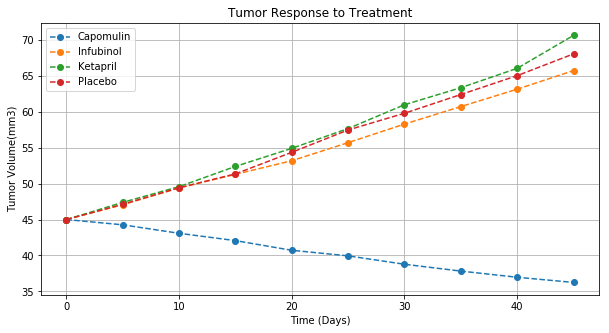

In [42]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Placebo'], yerr=None, linestyle="--", fmt='o')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend()       
plt.show()

## Metastatic Response to Treatment

In [43]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combine_group_mean_met= mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
met_response_mean_df = pd.DataFrame(combine_group_mean_met["Metastatic Sites"])

# Preview DataFrame 
met_response_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [44]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combine_group_met_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_response_sem_df = pd.DataFrame(combine_group_sem)

# Preview DataFrame
met_response_sem_df.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [45]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
met_response_mean_df.reset_index(level = None, inplace = True)
met_response_mean_df2 = pd.DataFrame(combine_group_mean)


pivot_table_met = met_response_mean_df2.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [46]:
met_table_fourdrugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
met_table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


In [47]:

#met_response_sem_df.reset_index(level = None, inplace = True)
#combine_group_met_se_df= pd.DataFrame(combine_group_met_se)

#Collect the y- errors for the four focus drugs to use in the error plot

#Capomulin_met_error_df=met_response_sem_df.loc['Capomulin',["Metastatic Sites"]]
#Capomulin_met_error=Capomulin_met_error_df.iloc[:, 0].values
#Capomulin_met_error

#Capomulin_error_df=tumor_response_sem_tumorvol_df.loc['Capomulin',["Tumor Volume (mm3)"]]
#Capomulin_error=Capomulin_error_df.iloc[:, 0].values



#Infubinol_error_df=tumor_response_sem_tumorvol_df.loc['Infubinol',["Tumor Volume (mm3)"]]
#Infubinol_error=Infubinol_error_df.iloc[:, 0].values


#Ketapril_error_df=tumor_response_sem_tumorvol_df.loc['Ketapril',["Tumor Volume (mm3)"]]
#Ketapril_error=Ketapril_error_df.iloc[:, 0].values


#Placebo_error_df=tumor_response_sem_tumorvol_df.loc['Placebo',["Tumor Volume (mm3)"]]
#Placebo_error=Placebo_error_df.iloc[:, 0].values


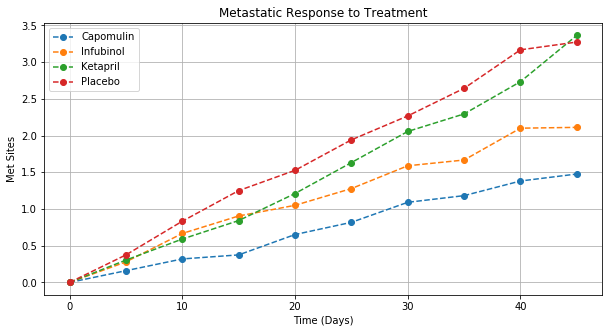

<Figure size 432x288 with 0 Axes>

In [48]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Placebo'], yerr=None, linestyle="--", fmt='o')

plt.ylabel("Met Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.grid()
plt.legend()       
plt.show()
# Save the Figure
plt.savefig("../MetSiteRespnse.png")


## Survival Rates

In [49]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=mouse_clinical_combine.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micecount_df=pd.DataFrame(micecount["Mouse ID"])
micecount_df.reset_index(inplace=True)

#Display dataframe
micecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [50]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_mice = micecount_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table_mice.head()



Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [51]:
mice_table_fourdrugs = pivot_table_mice[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mice_table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


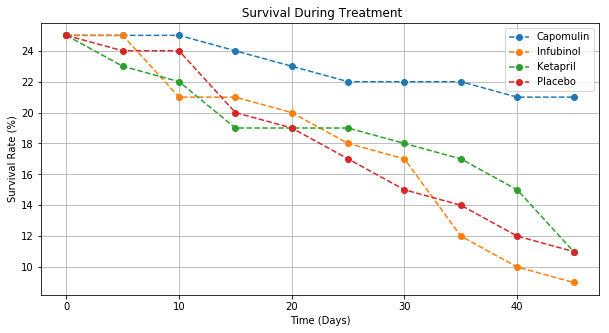

<Figure size 432x288 with 0 Axes>

In [52]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10, 5))


plt.errorbar(x=mice_table_fourdrugs['Timepoint'],y=mice_table_fourdrugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=mice_table_fourdrugs['Timepoint'],y=mice_table_fourdrugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=mice_table_fourdrugs['Timepoint'],y=mice_table_fourdrugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=mice_table_fourdrugs['Timepoint'],y=mice_table_fourdrugs['Placebo'], yerr=None, linestyle="--", fmt='o')

plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend()       
plt.show()
# Save the Figure
plt.savefig("../SurvivalRespnse.png")


## Summary Bar Graph

In [163]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [53]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()